In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
sns.set(rc={"figure.figsize":(15,8)})

In [2]:
## Reading data set

dataset=pd.read_csv('Datasets/cleaned_data1.csv')

#### Basic profile report

In [4]:
## Checking dataset information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48813 entries, 0 to 48812
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48813 non-null  float64
 1   workclass       46014 non-null  object 
 2   fnlwgt          48813 non-null  float64
 3   education       48813 non-null  object 
 4   education_num   48813 non-null  float64
 5   marital_status  48813 non-null  object 
 6   occupation      46004 non-null  object 
 7   relationship    48813 non-null  object 
 8   race            48813 non-null  object 
 9   sex             48813 non-null  object 
 10  captial_gain    48813 non-null  float64
 11  capital_loss    48813 non-null  float64
 12  hours_per_week  48813 non-null  float64
 13  native_country  47957 non-null  object 
 14  income          48813 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


In [5]:
## describing the dataset

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48813.0,38.647348,13.709005,17.0,28.0,37.0,48.0,90.0
fnlwgt,48813.0,189667.904964,105606.243360,12285.0,117555.0,178140.0,237620.0,1490400.0
education_num,48813.0,10.078688,2.570257,1.0,9.0,10.0,12.0,16.0
captial_gain,48813.0,1079.708705,7454.185982,0.0,0.0,0.0,0.0,99999.0
capital_loss,48813.0,87.554299,403.118605,0.0,0.0,0.0,0.0,4356.0
hours_per_week,48813.0,40.425051,12.390954,1.0,40.0,40.0,45.0,99.0


In [6]:
## checking the null values

dataset.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
captial_gain         0
capital_loss         0
hours_per_week       0
native_country     856
income               0
dtype: int64

<AxesSubplot:>

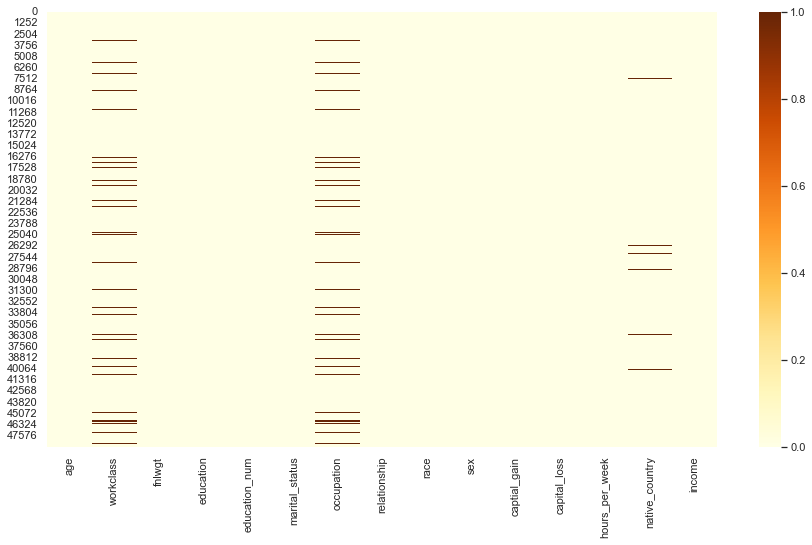

In [7]:
## Visualizing null values

sns.heatmap(dataset.isnull(),cmap='YlOrBr')

- There are missing values in categorical variables

#### seperating numerical and categorical features

In [3]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype !='O']
catergorical_features=[feature for feature in dataset.columns if feature not in numerical_features]

print(f'Numerical features  {numerical_features}')
print(f'Numerical features  {catergorical_features}')

Numerical features  ['age', 'fnlwgt', 'education_num', 'captial_gain', 'capital_loss', 'hours_per_week']
Numerical features  ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [4]:
income_handling={'<=50K':0,'<=50K.':0,'>50K':1,'>50K.':1}

dataset['income'].replace(income_handling,inplace=True)

In [10]:
dataset['income'].unique()

array([0, 1], dtype=int64)

- 0 --> income less than 50k
- 1 --> income greater tham 50k

### Univariate Analysis

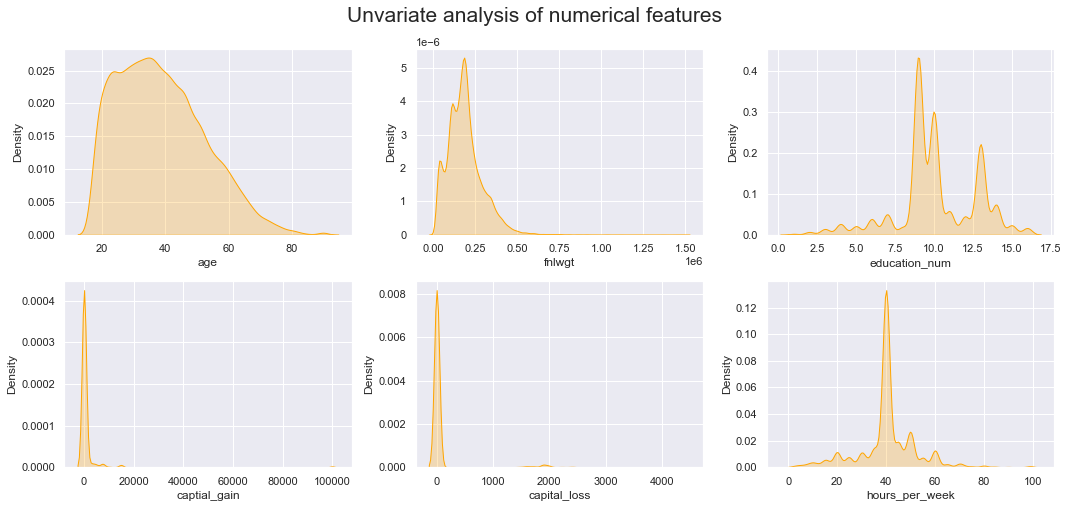

In [39]:
plt.suptitle('Unvariate analysis of numerical features',fontsize=21)

i=1

for feature in numerical_features:
    plt.subplot(3,3,i)
    i=i+1
    sns.kdeplot(x=feature,data=dataset,color='orange',shade=True)
    plt.xlabel=feature
    plt.ylabel='Frequency'
    plt.tight_layout()

#### Univariate analysis of categorical features

In [11]:
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


#### What is most common education studied


<AxesSubplot:title={'center':'Distribution of Education by category'}>

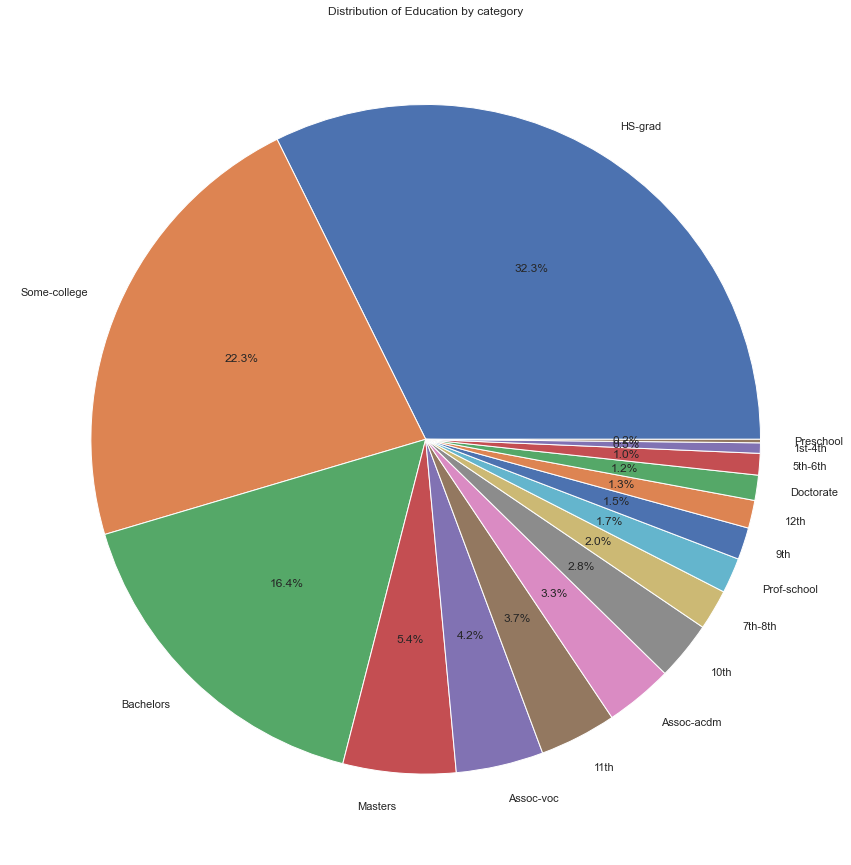

In [12]:
dataset['education'].value_counts().plot.pie(y=dataset['education'],figsize = (15, 16), label = '', autopct = '%1.1f%%', title = 'Distribution of Education by category',)

- We can see that most of the people studied high school graduation,some college and bachelors

#### Education VS Income

In [28]:
### checking how many people are earning >50 and <50k in each education sector

dataset.groupby(['education','income']).agg({'income':'count'})

income
education    income        
10th         0         1302
             1           87
11th         0         1720
             1           92
12th         0          608
             1           48
1st-4th      0          237
             1            8
5th-6th      0          481
             1           27
7th-8th      0          892
             1           62
9th          0          715
             1           41
Assoc-acdm   0         1188
             1          413
Assoc-voc    0         1538
             1          522
Bachelors    0         4707
             1         3313
Doctorate    0          163
             1          431
HS-grad      0        13275
             1         2502
Masters      0         1197
             1         1459
Preschool    0           81
             1            1
Prof-school  0          217
             1          617
Some-college 0         8807
             1         2062

Text(0.5, 1.0, 'Education Vs Income')

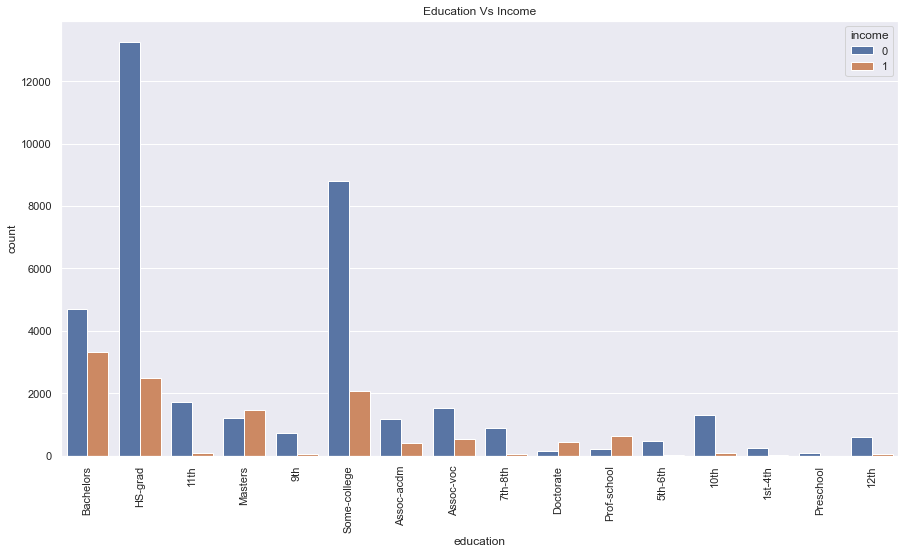

In [13]:
sns.set_theme(style="darkgrid")
sns.countplot(dataset['education'],hue=dataset['income'])
plt.xticks(rotation=90)
plt.title('Education Vs Income')

## 0 = income <=50k
## 1 = income >50k

- Only a few members are have income greater than 50000
- Many high school graduation people has the income less than 50000
- The people with any graduation has less than 50k income
- Higher education tends to higher income

In [14]:
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


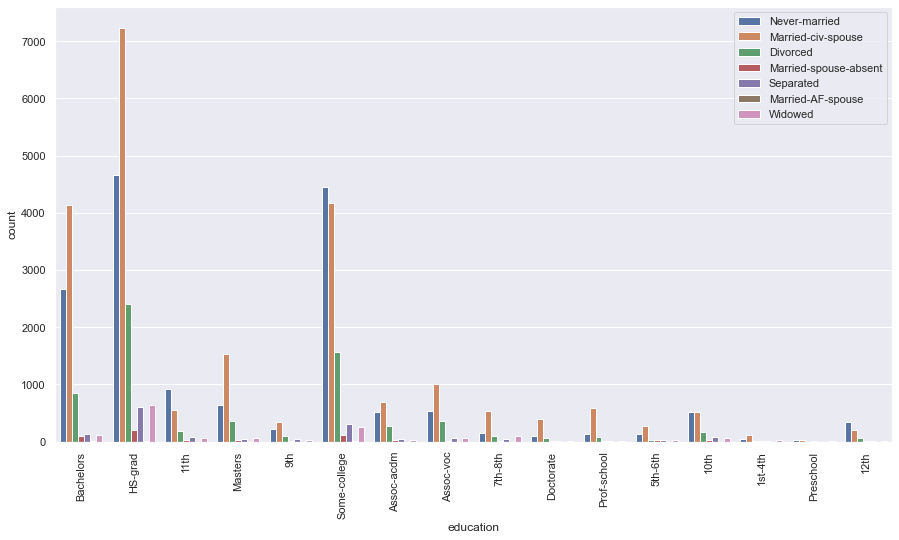

In [15]:
sns.countplot(x='education',hue='marital_status',data=dataset)
plt.xticks(rotation=90)
plt.legend(loc='upper right')

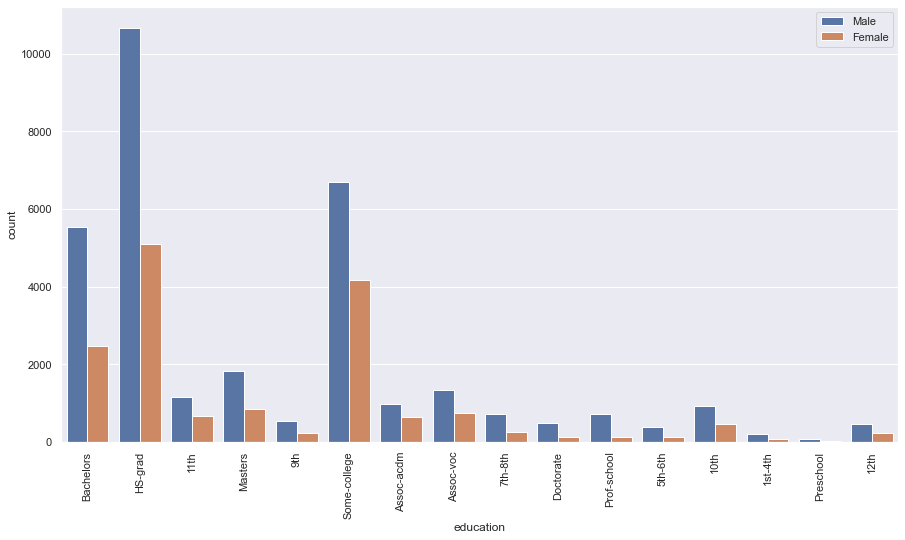

In [16]:
sns.countplot(x='education',hue='sex',data=dataset)
plt.xticks(rotation=90)
plt.legend(loc='upper right')

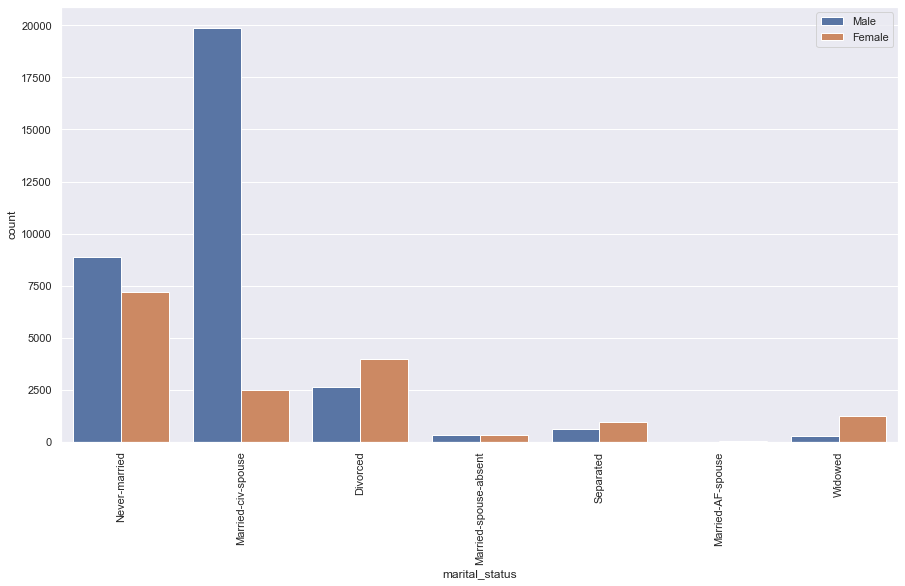

In [17]:
sns.countplot(hue='sex',x='marital_status',data=dataset)
plt.xticks(rotation=90)
plt.legend(loc='upper right')

- Here the education_num column is a numerical conversion of 'education'. As the information is the same, we can delete the education column.

In [18]:
## Checking if income is higher if number of worling hours per week is more


temp=pd.crosstab(index=dataset['hours_per_week'],columns=dataset['income'],normalize='index')

<AxesSubplot:xlabel='hours_per_week'>

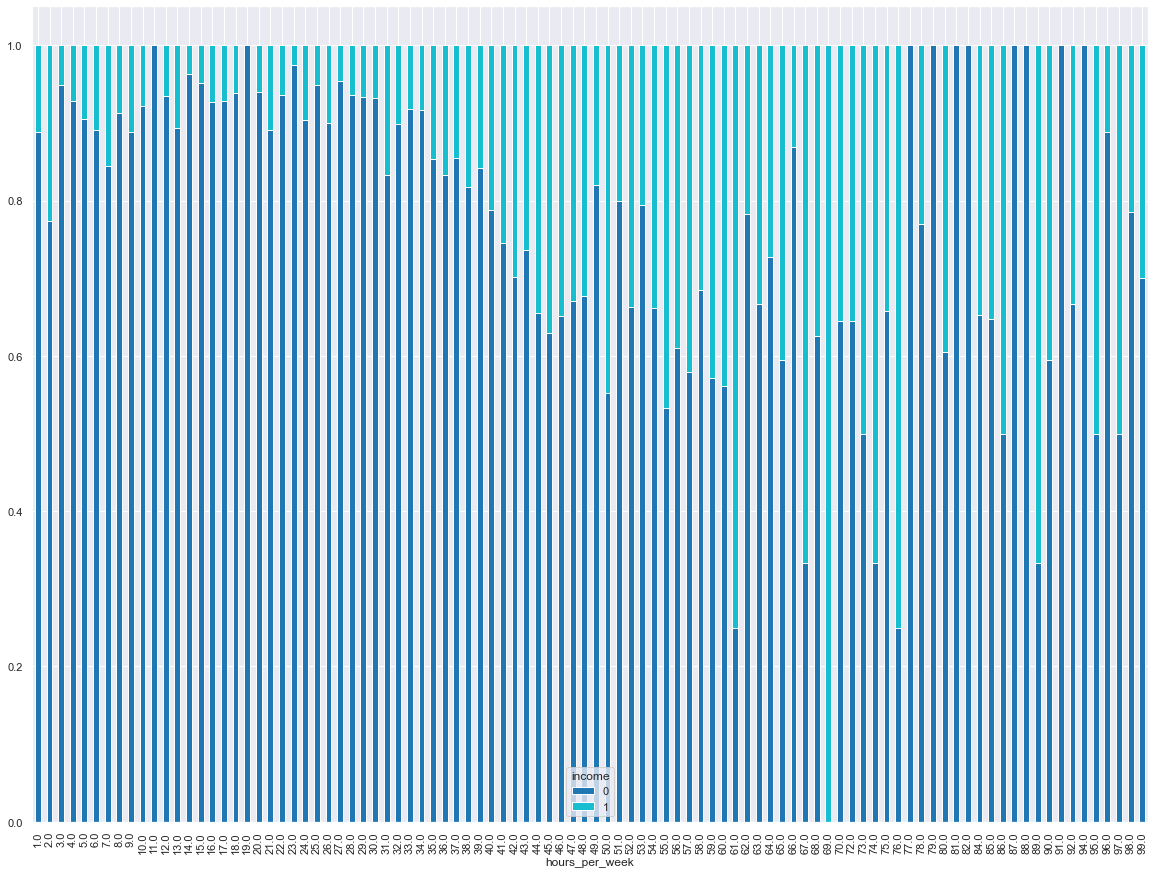

In [19]:
temp.plot(kind='bar', 
                stacked=True, 
                colormap='tab10', figsize=(20,15))

Observation:

1) Longer working hours does not necessarily equates to higher income

In [20]:
## Checking if income is higher based on country


temp=pd.crosstab(index=dataset['native_country'],columns=dataset['income'],normalize='index')

<AxesSubplot:xlabel='native_country'>

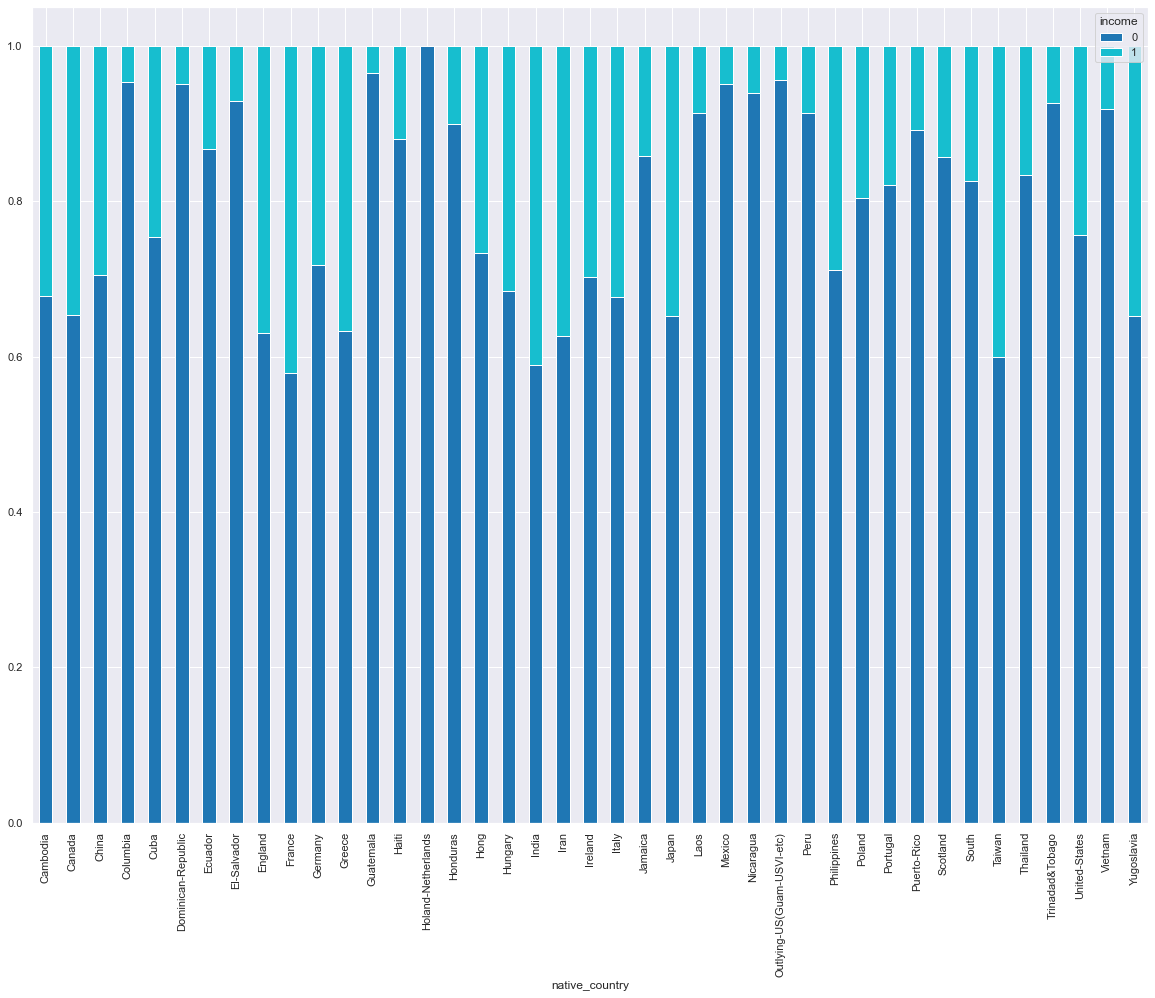

In [22]:
temp.plot(kind='bar', 
                stacked=True, 
                colormap='tab10', figsize=(20,15))

In [27]:
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Machine-op-inspct'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

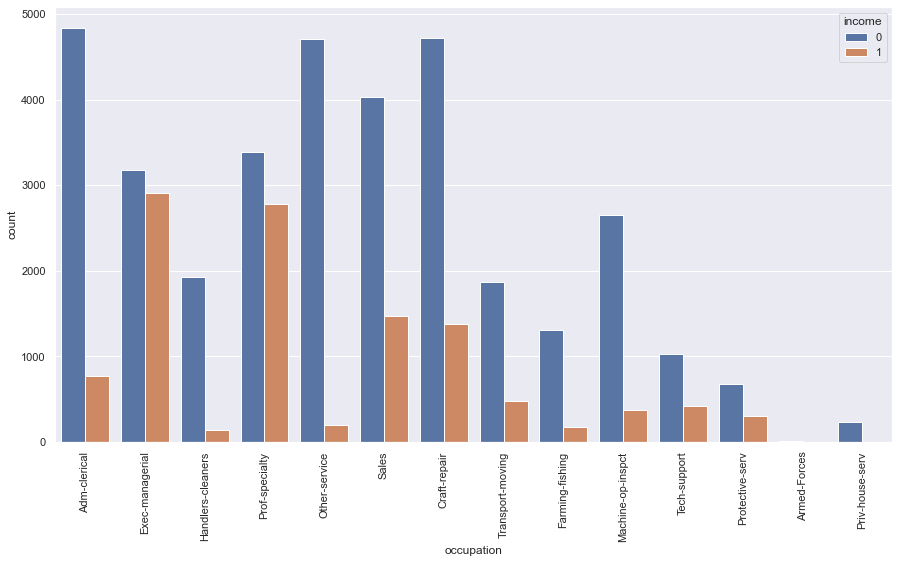

In [33]:
sns.countplot(x='occupation',hue='income',data=dataset)
plt.xticks(rotation=90)

In [35]:
dataset['capital_income']=dataset['captial_gain']-dataset['capital_loss']

In [36]:
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,native_country,income,capital_income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0,2174.0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0,0.0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0,0.0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0,0.0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0,0.0


<AxesSubplot:xlabel='capital_income', ylabel='Density'>

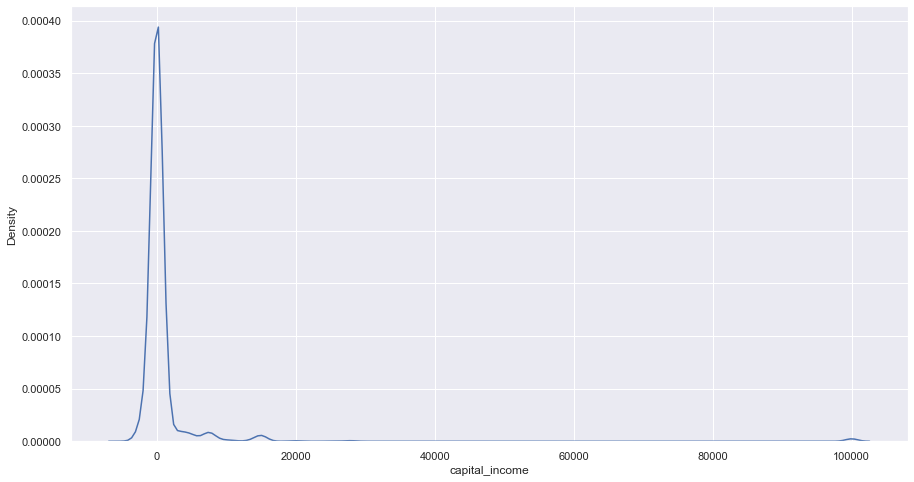

In [38]:
sns.kdeplot(dataset['capital_income'])

<AxesSubplot:xlabel='income'>

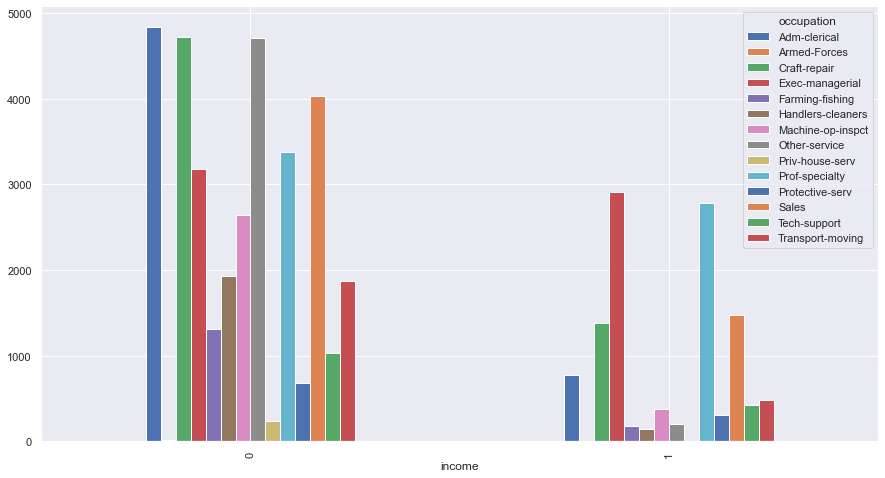

In [51]:
pd.crosstab(index=dataset['income'],columns=dataset['occupation']).plot.bar()

## Hypothesis testing

In [ ]:
### Hypothesis testing for hours_per_week

In [6]:
#### Mean and std of the hours_per_week(population mean and std)
print('Population mean {} \nPopulation standard deviation {}'.format(dataset['hours_per_week'].mean(),dataset['hours_per_week'].std()))

Population mean 40.42505070370598 
Population standard deviation 12.390954377658954


In [68]:
## Taking a sample of 1000 people

sample = dataset.sample(1000,random_state=0)

In [69]:
#### Mean and std of the hours_per_week(population mean and std)
print('Sample mean {} '.format(sample['hours_per_week'].mean()))

Sample mean 41.152 


In [70]:
pop_mean = dataset['hours_per_week'].mean()
pop_std = dataset['hours_per_week'].std()
samp_mean = sample['hours_per_week'].mean()

null hypothesis mu = 40.42

alternate hypothesis mu != 40.42

ci = 95

significance level = 0.05

n= 100


In [71]:
import scipy.stats as stats

In [72]:
ttest,p_value = stats.ttest_1samp(a=sample['hours_per_week'],popmean=pop_mean)

In [74]:
p_value

0.07141579565925756

In [76]:
if p_value < 0.05:
    print("We reject the null hypothesis, The Average  working hours is not equal to 40.42")
else:
    print("We failed to reject the null hypothesis. The Average working hours are equal")

We failed to reject the null hypothesis. The Average working hours are equal


In [ ]:
### hypothesis testing for age 

In [77]:
#### Mean and std of the hours_per_week(population mean and std)
print('Population mean {} \nPopulation standard deviation {}'.format(dataset['age'].mean(),dataset['age'].std()))

Population mean 38.64734804252966 
Population standard deviation 13.709004614887872


In [83]:
## Taking a sample of 100 people

sample = dataset.sample(100,random_state=0)

In [84]:
#### Mean and std of the hours_per_week(population mean and std)
print('Sample mean {} '.format(sample['age'].mean()))

Sample mean 37.77 


In [85]:
pop_mean = dataset['age'].mean()
pop_std = dataset['age'].std()
samp_mean = sample['age'].mean()

null hypothesis mu =38.64

alternate hypothesis mu != 38.64

ci = 95

significance level = 0.05

n= 100


In [5]:
import scipy.stats as stats

In [87]:
ttest,p_value = stats.ttest_1samp(a=sample['age'],popmean=pop_mean)

In [88]:
p_value

0.537780712776449

In [89]:
if p_value < 0.05:
    print("We reject the null hypothesis, The Average  age is not equal to 38.64")
else:
    print("We failed to reject the null hypothesis. The Average ages is equal")

We failed to reject the null hypothesis. The Average ages is equal


### ChiSquare test

- Null Hypothesis (H0): There is no substantial relationship between the two variables (in case of independence test), or there is no difference in variable distribution (in case of goodness of fit). 
- Alternative Hypothesis (H1): There is a substantial relationship between variables (in case of independence test) or a significant variation in variable distribution (in case of goodness of fit).

-  A chi-square test for independence might be used to assess the association between categorical variables.

In [14]:
ct_table_ind=pd.crosstab(dataset["education"],dataset["income"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 income            0     1
education                
10th           1302    87
11th           1720    92
12th            608    48
1st-4th         237     8
5th-6th         481    27
7th-8th         892    62
9th             715    41
Assoc-acdm     1188   413
Assoc-voc      1538   522
Bachelors      4707  3313
Doctorate       163   431
HS-grad       13275  2502
Masters        1197  1459
Preschool        81     1
Prof-school     217   617
Some-college   8807  2062


In [15]:
chi2_stat, p, dof, expected = stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     6537.9
p-value:            0
degrees of freedom: 15
expected frequencies:
 [[ 1056.4970807    332.5029193 ]
 [ 1378.23809231   433.76190769]
 [  498.96478397   157.03521603]
 [  186.35117694    58.64882306]
 [  386.39346076   121.60653924]
 [  725.6286645    228.3713355 ]
 [  575.02648885   180.97351115]
 [ 1217.74789503   383.25210497]
 [ 1566.8711204    493.1288796 ]
 [ 6100.14873087  1919.85126913]
 [  451.80652695   142.19347305]
 [12000.25517792  3776.74482208]
 [ 2020.19888145   635.80111855]
 [   62.370598      19.629402  ]
 [  634.35461865   199.64538135]
 [ 8267.14670272  2601.85329728]]


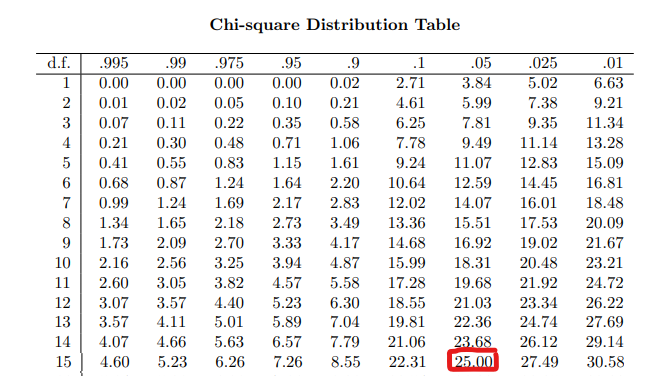

- The critical value for the chi-square test with a degree of freedom of 15 and alpha 0.05 is `25.00`
- Since the test statistic (25.00) exceeds the critical value the null hypothesis is rejected. 
- Therefore, the education level and the income are dependent on each other.

In [17]:
## chisqaure test for occupation and income


ct_table=pd.crosstab(dataset['occupation'],dataset['income'])
print('contingency table \n',ct_table)

contingency table 
 income                0     1
occupation                   
Adm-clerical       4840   768
Armed-Forces         10     5
Craft-repair       4724  1383
Exec-managerial    3176  2908
Farming-fishing    1314   173
Handlers-cleaners  1933   138
Machine-op-inspct  2648   371
Other-service      4715   204
Priv-house-serv     237     3
Prof-specialty     3384  2783
Protective-serv     675   308
Sales              4029  1475
Tech-support       1025   420
Transport-moving   1874   481


In [19]:
chi2_stat,p,d,expected=stats.chi2_contingency(ct_table)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     5500.6
p-value:            0
degrees of freedom: 15
expected frequencies:
 [[4.21587410e+03 1.39212590e+03]
 [1.12764107e+01 3.72358925e+00]
 [4.59100270e+03 1.51599730e+03]
 [4.57371220e+03 1.51028780e+03]
 [1.11786819e+03 3.69131815e+02]
 [1.55689644e+03 5.14103556e+02]
 [2.26956560e+03 7.49434397e+02]
 [3.69791096e+03 1.22108904e+03]
 [1.80422572e+02 5.95774280e+01]
 [4.63610834e+03 1.53089166e+03]
 [7.38980784e+02 2.44019216e+02]
 [4.13769098e+03 1.36630902e+03]
 [1.08629424e+03 3.58705765e+02]
 [1.77039649e+03 5.84603513e+02]]


- The critical value for the chi-square test with a degree of freedom of 15 and alpha 0.05 is 25.00
- Since the test statistic (25.00) exceeds the critical value the null hypothesis is rejected.
- Therefore, the education level and the income are dependent on each other.

In [7]:
ct_table_ind=pd.crosstab(dataset["workclass"],dataset["income"])
print('contingency_table :\n',ct_table_ind)
print('\n')
chi2_stat, p, dof, expected = stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

contingency_table :
 income                0     1
workclass                    
Federal-gov         871   561
Local-gov          2209   927
Never-worked         10     0
Private           26494  7385
Self-emp-inc        756   938
Self-emp-not-inc   2784  1077
State-gov          1451   530
Without-pay          19     2


chi2 statistic:     1238.6
p-value:            3.1373e-263
degrees of freedom: 7
expected frequencies:
 [[1.07659860e+03 3.55401400e+02]
 [2.35769079e+03 7.78309210e+02]
 [7.51814665e+00 2.48185335e+00]
 [2.54707290e+04 8.40827096e+03]
 [1.27357404e+03 4.20425957e+02]
 [2.90275642e+03 9.58243578e+02]
 [1.48934485e+03 4.91655148e+02]
 [1.57881080e+01 5.21189203e+00]]


In [8]:
if p>14.07:
    print("There is a sustainable dependancy between work class and income")
else:
    print("There is no sutainable relation ship between workclass and income")

There is no sutainable relation ship between workclass and income


In [13]:
ct_table_ind=pd.crosstab(dataset["native_country"],dataset["income"])
print('contingency_table :\n',ct_table_ind)

chi2_stat, p, dof, expected = stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

contingency_table :
 income                          0      1
native_country                          
Cambodia                       19      9
Canada                        119     63
China                          86     36
Columbia                       81      4
Cuba                          104     34
Dominican-Republic             98      5
Ecuador                        39      6
El-Salvador                   144     11
England                        80     47
France                         22     16
Germany                       148     58
Greece                         31     18
Guatemala                      83      3
Haiti                          66      9
Holand-Netherlands              1      0
Honduras                       18      2
Hong                           22      8
Hungary                        13      6
India                          89     62
Iran                           37     22
Ireland                        26     11
Italy                          71   

In [14]:
if p>58:
    print("There is a sustainable dependancy between native_country and income")
else:
    print("There is no sutainable relation ship between native count and income")

There is no sutainable relation ship between workclass and income
